In [2]:
import time
import pandas as pd 
import lightgbm as lgb
from sklearn.model_selection import train_test_split

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
wd = ['/Users/ewenwang/Documents/practice_data/conversion_rate/', '/Users/ewenwang/Documents/GitHub/Kaggle/conversion_rate/round2/']

test_file = ['round2_ijcai_18_test_a_20180425.txt']

uisc_file = ['round2_uisc_train_7.txt', 'round2_uisc_test_a.txt']
mat_file = ['round2_mat_train_7.txt' ,'round2_mat_test_a.txt']
match_file = ['round2_match_train_7.txt', 'round2_match_test_a.txt']
page_file = ['round2_page_data_a.txt']

print('loading...')
t0=time.time()
train = pd.read_csv(wd[0]+uisc_file[0], sep=' ')
test = pd.read_csv(wd[0]+uisc_file[1], sep=' ')

pagerank = pd.read_csv(wd[0]+page_file[0], sep=' ')
print('\ttime spend: ', time.time()-t0)

print('training data merging...')
t0=time.time()
train = (train.merge(pd.read_csv(wd[0]+mat_file[0], sep=' '), on='instance_id', how='left')
                 .merge(pd.read_csv(wd[0]+match_file[0], sep=' '), on='instance_id', how='left')
                 .merge(pagerank, on='instance_id', how='left'))
print('\ttime spend: ', time.time()-t0)

print('test data merging...')
t0=time.time()
test = (test.merge(pd.read_csv(wd[0]+mat_file[1], sep=' '), on='instance_id', how='left')
               .merge(pd.read_csv(wd[0]+match_file[1], sep=' '), on='instance_id', how='left')
               .merge(pagerank, on='instance_id', how='left'))
print('\ttime spend: ', time.time()-t0)

loading...
	time spend:  60.810832023620605
training data merging...
	time spend:  148.30159497261047
test data merging...
	time spend:  63.17984890937805


In [3]:
train.to_csv(wd[0]+'round2_union_train_7.txt', index=False, sep=' ')
test.to_csv(wd[0]+'round2_union_test_a.txt', index=False, sep=' ')

In [3]:
wd = ['/Users/ewenwang/Documents/practice_data/conversion_rate/', '/Users/ewenwang/Documents/GitHub/Kaggle/conversion_rate/round2/']

union_file = ['round2_union_train_7.txt', 'round2_union_test_a.txt']

train = pd.read_csv(wd[0]+'round2_union_train_7.txt', sep=' ')
test = pd.read_csv(wd[0]+'round2_union_test_a.txt', sep=' ')

In [15]:
print(test.shape)
print(train.shape)

(519888, 310)
(1077175, 310)


In [9]:
for i in train.columns:
    print(i)

context_id_x
context_page_id_x
instance_id
is_trade_x
item_brand_id_x
item_city_id_x
item_collected_level_x
item_id_x
item_price_level_x
item_pv_level_x
item_sales_level_x
realtime
shop_id_x
shop_review_num_level_x
shop_review_positive_rate_x
shop_score_delivery_x
shop_score_description_x
shop_score_service_x
shop_star_level_x
user_age_level_x
user_gender_id_x
user_id_x
user_occupation_id_x
user_star_level_x
hour
minute
minute_of_day
user_id_cnt
item_id_user_id_cnt
item_brand_id_user_id_cnt
item_city_id_user_id_cnt
item_price_level_user_id_cnt
item_sales_level_user_id_cnt
item_collected_level_user_id_cnt
item_pv_level_user_id_cnt
shop_id_user_id_cnt
shop_review_num_level_user_id_cnt
shop_star_level_user_id_cnt
context_id_user_id_cnt
hour_user_id_cnt
context_page_id_user_id_cnt
user_gender_id_cnt
item_id_user_gender_id_cnt
item_brand_id_user_gender_id_cnt
item_city_id_user_gender_id_cnt
item_price_level_user_gender_id_cnt
item_sales_level_user_gender_id_cnt
item_collected_level_user_gen

In [5]:
train_, valid_ = train_test_split(train, test_size=0.2, random_state=0)

In [6]:
target = 'is_trade_x'
drop_list = ['is_trade_x', 'is_trade_y', 'instance_id',
             'item_category_list', 'item_property_list', 'predict_category_property', 
             'context_realtime', 'context_hour', 'context_day', 'realtime']
features = [x for x in train.columns if x not in drop_list]

In [16]:
print(train_.shape)
print(valid_.shape)

(861740, 310)
(215435, 310)


In [14]:
train_.head()

,context_id_x,context_page_id_x,instance_id,is_trade_x,item_brand_id_x,item_city_id_x,item_collected_level_x,item_id_x,item_price_level_x,item_pv_level_x,...,item_is_trade_past_count,item_past_cvr,item_user_gender_past_avg,item_user_age_past_avg,item_user_oppcupation_past_avg,item_user_star_past_avg,match_cat,match_ct,user_pagerank,item_pagerank
54674,984116,4006,8556589603135915299,0.0,4237,75,12,28329,8,17,...,848.0,1.0,0.215802,1003.837264,2003.913915,3004.797170,0.0,2.0,1.601509e-06,0.000088
653543,927397,4001,1146992214670236805,0.0,27,20,15,1364,8,19,...,7198.0,1.0,0.223673,1000.811892,1998.525146,2995.394276,0.0,2.0,4.606031e-07,0.000382
110070,341412,4014,8024119818865797410,0.0,0,20,12,15741,2,17,...,755.0,1.0,0.231788,1003.598675,2003.936424,3004.421192,0.0,2.0,7.143044e-07,0.000037
631265,1438277,4001,6879310268537982315,0.0,4506,13,11,13998,7,19,...,1742.0,1.0,0.172790,999.198622,1993.619977,2987.914466,0.0,2.0,5.548944e-07,0.000189
441233,6335,4001,4667095300417810211,0.0,7716,108,13,26989,7,19,...,3912.0,1.0,0.186861,1002.579499,2001.083333,3002.734407,NaN,NaN,5.753924e-07,0.000670


In [7]:
X = train_[features]
y = train_[target]
X_tes = valid_[features]
y_tes = valid_[target]

In [24]:
print('Training LGBM model...')
t0=time.time()
lgb_1 = lgb.LGBMClassifier(
    objective='binary',
    metric='binary_logloss',
    num_leaves=16,
    depth=4,
    learning_rate=0.01,
    seed=2018,
    colsample_bytree=0.6,
    subsample=0.9,
    n_estimators=20000,
    silent = True)

lgb_model_1 = lgb_1.fit(X, y, eval_set=[(X_tes, y_tes)], early_stopping_rounds=200, verbose=False, callbacks=[lgb.print_evaluation(100)])
print('\ttime spend: ', time.time()-t0)

best_iter = lgb_model_1.best_iteration_
best_score = lgb_model_1.best_score_

print('best_iter: ', best_iter, '\nbest_score: ', best_score)

Training LGBM model...
[100]	valid_0's binary_logloss: 0.297726
[200]	valid_0's binary_logloss: 0.207298
[300]	valid_0's binary_logloss: 0.18531
[400]	valid_0's binary_logloss: 0.180069
[500]	valid_0's binary_logloss: 0.178443
[600]	valid_0's binary_logloss: 0.177692
[700]	valid_0's binary_logloss: 0.177231
[800]	valid_0's binary_logloss: 0.176913
[900]	valid_0's binary_logloss: 0.176684
[1000]	valid_0's binary_logloss: 0.176498
[1100]	valid_0's binary_logloss: 0.176365
[1200]	valid_0's binary_logloss: 0.176262
[1300]	valid_0's binary_logloss: 0.17618
[1400]	valid_0's binary_logloss: 0.176114
[1500]	valid_0's binary_logloss: 0.176049
[1600]	valid_0's binary_logloss: 0.176
[1700]	valid_0's binary_logloss: 0.175966
[1800]	valid_0's binary_logloss: 0.175927
[1900]	valid_0's binary_logloss: 0.175888
[2000]	valid_0's binary_logloss: 0.175862
[2100]	valid_0's binary_logloss: 0.175832
[2200]	valid_0's binary_logloss: 0.175808
[2300]	valid_0's binary_logloss: 0.17578
[2400]	valid_0's binary_lo

In [8]:
best_iter = 7025

X_2 = train[features]
y_2 = train[target].values

print('Training LGBM model...')
t0=time.time()
lgb_2 = lgb.LGBMClassifier(
    objective='binary',
    metric='binary_logloss',
    num_leaves=32,
    depth=4,
    learning_rate=0.01,
    seed=2018,
    colsample_bytree=0.6,
    subsample=0.9,
    n_estimators=best_iter,
    silent = True)

lgb_model_2 = lgb_2.fit(X_2, y_2)
print('\ttime spend: ', time.time()-t0)

Training LGBM model...
	time spend:  19400.498589992523



saving...
	time spend:  2.4094960689544678
plotting...


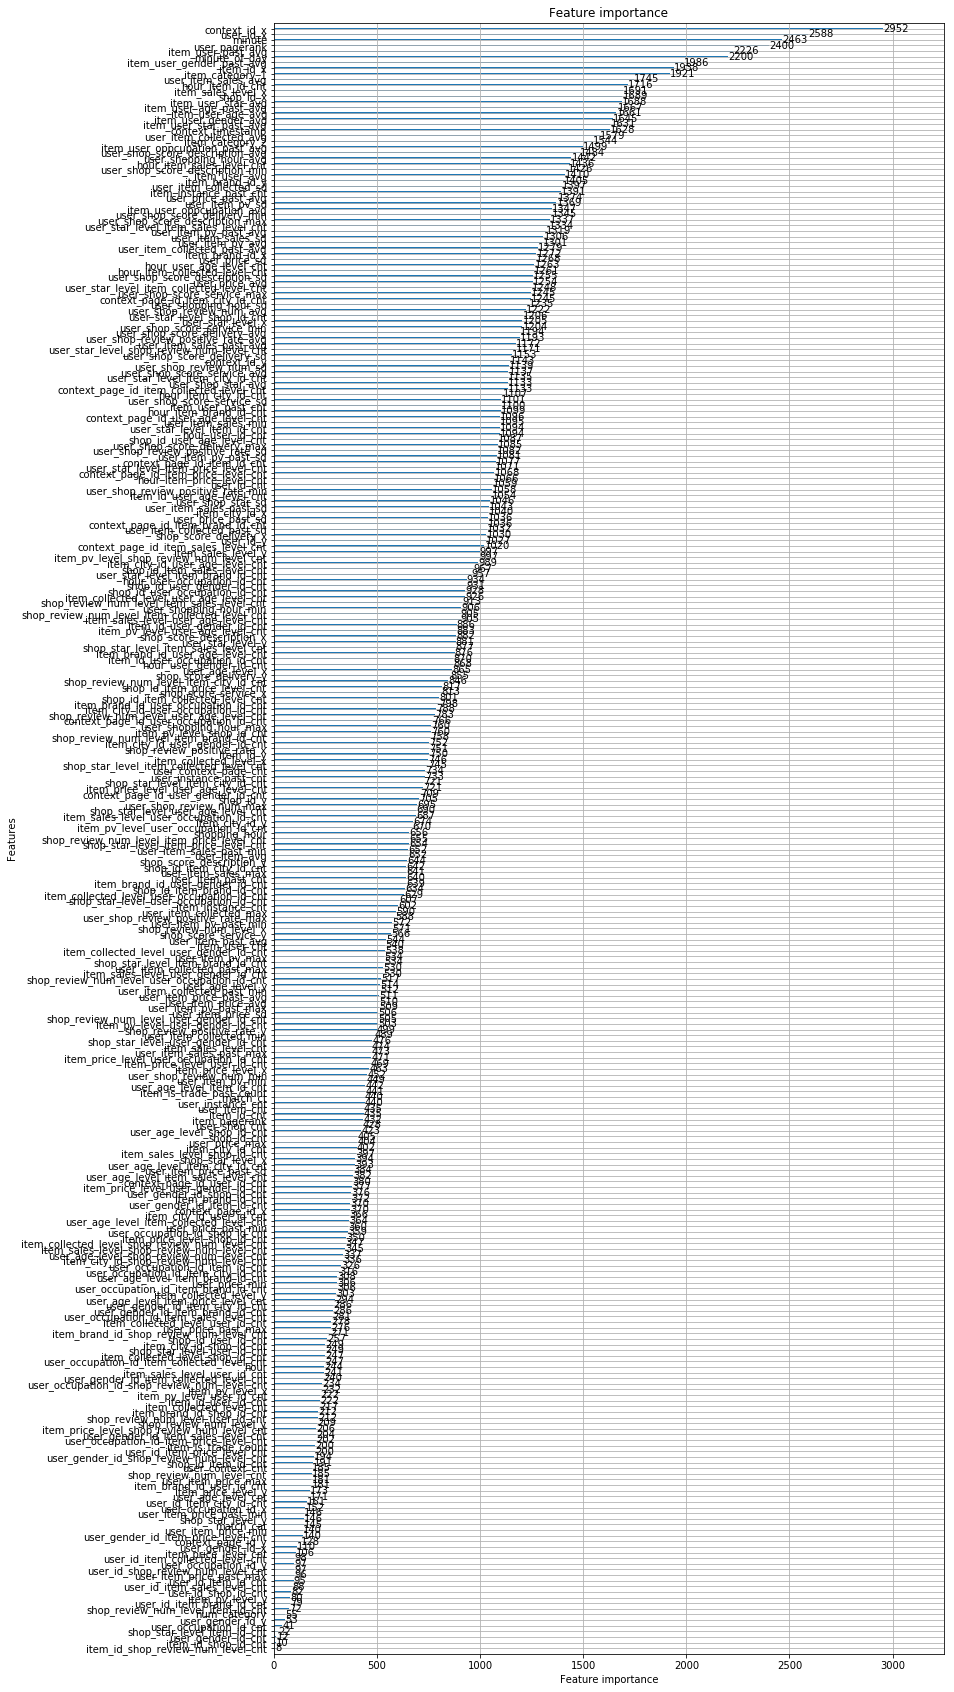

In [10]:
test_file = ['round2_ijcai_18_test_a_20180425.txt']

print('predicting...')
t0=time.time()
pred = lgb_model_2.predict_proba(test[features])[:, 1]
print('\ttime spend: ', time.time()-t0)

test['predicted_score'] = pred

result = test[['instance_id', 'predicted_score']]
result = pd.DataFrame(pd.read_csv(wd[0]+test_file[0], sep=' ')['instance_id']).merge(result, on='instance_id', how='left').fillna(0)

print('\nsaving...')
t0=time.time()
result.to_csv(wd[0]+'results.txt', sep=' ', index=False)
print('\ttime spend: ', time.time()-t0)

plotting...


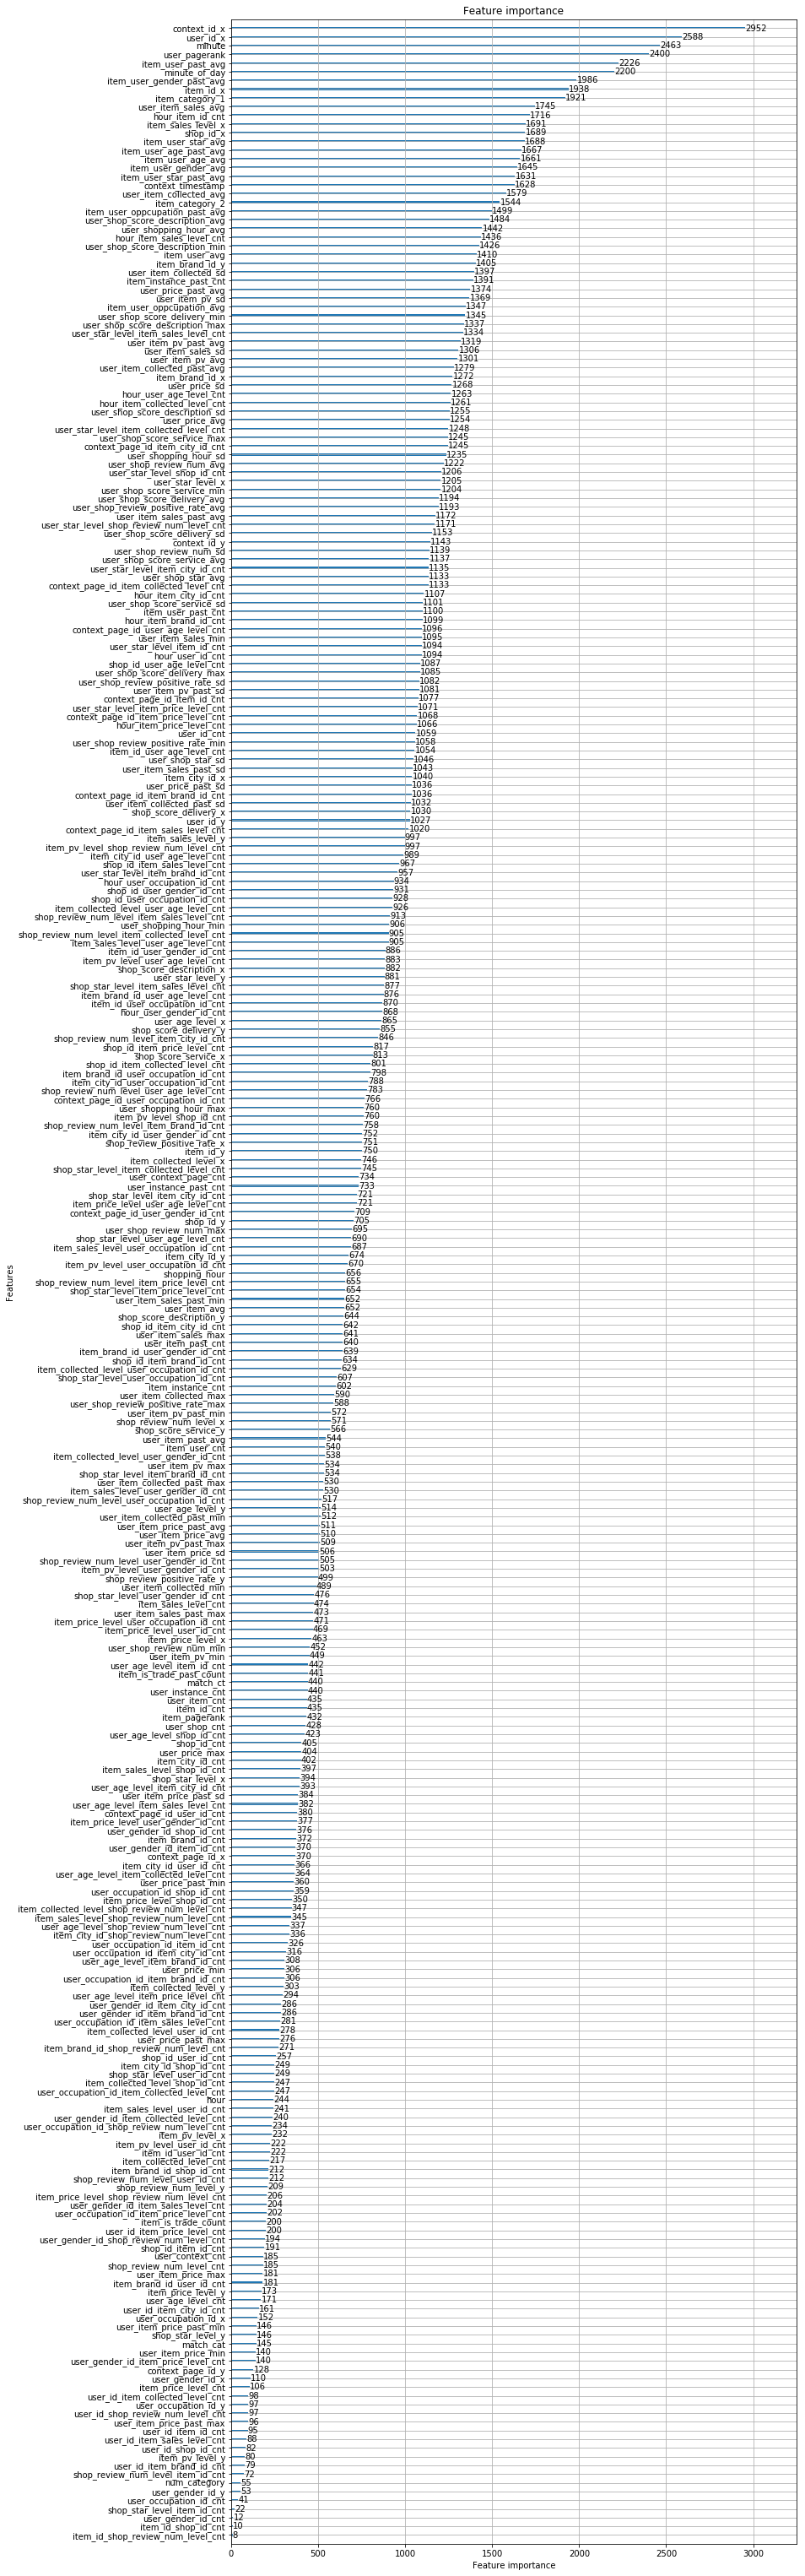

In [14]:
print('plotting...')
lgb.plot_importance(lgb_model_2, figsize=(12, 55))

## Validate on Hour 11

In [1]:
import pandas as pd
import Submission

wd = ['/Users/ewenwang/Documents/practice_data/conversion_rate/', '/Users/ewenwang/Documents/GitHub/Kaggle/conversion_rate/round2/']

union_file = ['round2_union_train_7.txt', 'round2_union_test_a.txt']

train = pd.read_csv(wd[0]+'round2_union_train_7.txt', sep=' ')
test = pd.read_csv(wd[0]+'round2_union_test_a.txt', sep=' ')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (182,183,198,206) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
import Submission

Submission.Submission(train, test, valid_hour=11)

Training LGBM model...
[100]	valid_0's binary_logloss: 0.294103
[200]	valid_0's binary_logloss: 0.201158
[300]	valid_0's binary_logloss: 0.177554
[400]	valid_0's binary_logloss: 0.171444
[500]	valid_0's binary_logloss: 0.169482
[600]	valid_0's binary_logloss: 0.168586
[700]	valid_0's binary_logloss: 0.168075
[800]	valid_0's binary_logloss: 0.167723
[900]	valid_0's binary_logloss: 0.167492
[1000]	valid_0's binary_logloss: 0.167306
[1100]	valid_0's binary_logloss: 0.167167
[1200]	valid_0's binary_logloss: 0.167047
[1300]	valid_0's binary_logloss: 0.166942
[1400]	valid_0's binary_logloss: 0.166874
[1500]	valid_0's binary_logloss: 0.166799
[1600]	valid_0's binary_logloss: 0.166751
[1700]	valid_0's binary_logloss: 0.166709
[1800]	valid_0's binary_logloss: 0.166673
[1900]	valid_0's binary_logloss: 0.16663
[2000]	valid_0's binary_logloss: 0.166593
[2100]	valid_0's binary_logloss: 0.166559
[2200]	valid_0's binary_logloss: 0.166523
[2300]	valid_0's binary_logloss: 0.166493
[2400]	valid_0's bina

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.6,
        depth=4, learning_rate=0.01, max_depth=-1, metric='binary_logloss',
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=5987, n_jobs=-1, num_leaves=32, objective='binary',
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, seed=2018,
        silent=True, subsample=0.9, subsample_for_bin=200000,
        subsample_freq=1)

## New Match Data

In [4]:
train, test = Submission.Merge()

loading...
	time spend:  67.30405902862549
training data merging...
	time spend:  2108.447453022003
test data merging...
	time spend:  80.46842074394226


In [5]:
train.to_csv(wd[0]+'round2_union_train_7.txt', index=False, sep=' ')
test.to_csv(wd[0]+'round2_union_test_a.txt', index=False, sep=' ')

Training LGBM model...
[100]	valid_0's binary_logloss: 0.294103
[200]	valid_0's binary_logloss: 0.201158
[300]	valid_0's binary_logloss: 0.177554
[400]	valid_0's binary_logloss: 0.171444
[500]	valid_0's binary_logloss: 0.169482
[600]	valid_0's binary_logloss: 0.168584
[700]	valid_0's binary_logloss: 0.168064
[800]	valid_0's binary_logloss: 0.167719
[900]	valid_0's binary_logloss: 0.167491
[1000]	valid_0's binary_logloss: 0.167303
[1100]	valid_0's binary_logloss: 0.167168
[1200]	valid_0's binary_logloss: 0.167046
[1300]	valid_0's binary_logloss: 0.166949
[1400]	valid_0's binary_logloss: 0.166874
[1500]	valid_0's binary_logloss: 0.166801
[1600]	valid_0's binary_logloss: 0.166756
[1700]	valid_0's binary_logloss: 0.166713
[1800]	valid_0's binary_logloss: 0.166673
[1900]	valid_0's binary_logloss: 0.166631
[2000]	valid_0's binary_logloss: 0.166599
[2100]	valid_0's binary_logloss: 0.166572
[2200]	valid_0's binary_logloss: 0.166536
[2300]	valid_0's binary_logloss: 0.166504
[2400]	valid_0's bin

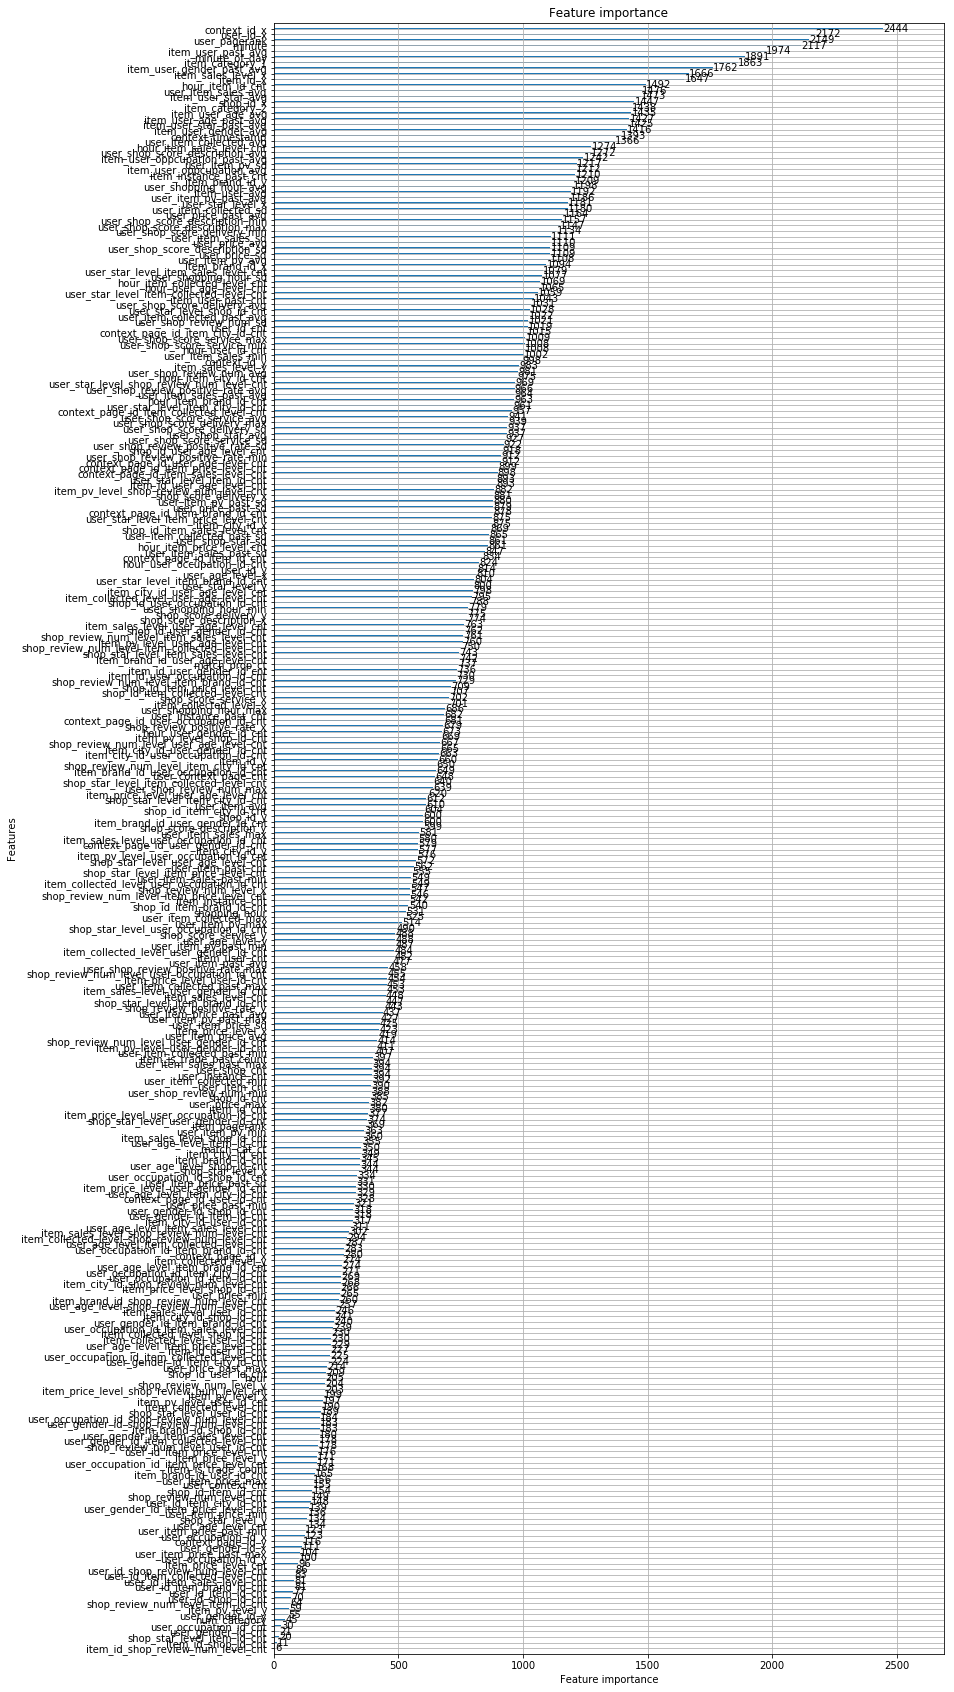

In [6]:
import Submission

model = Submission.Submission(train, test, valid_hour=11)

plotting...


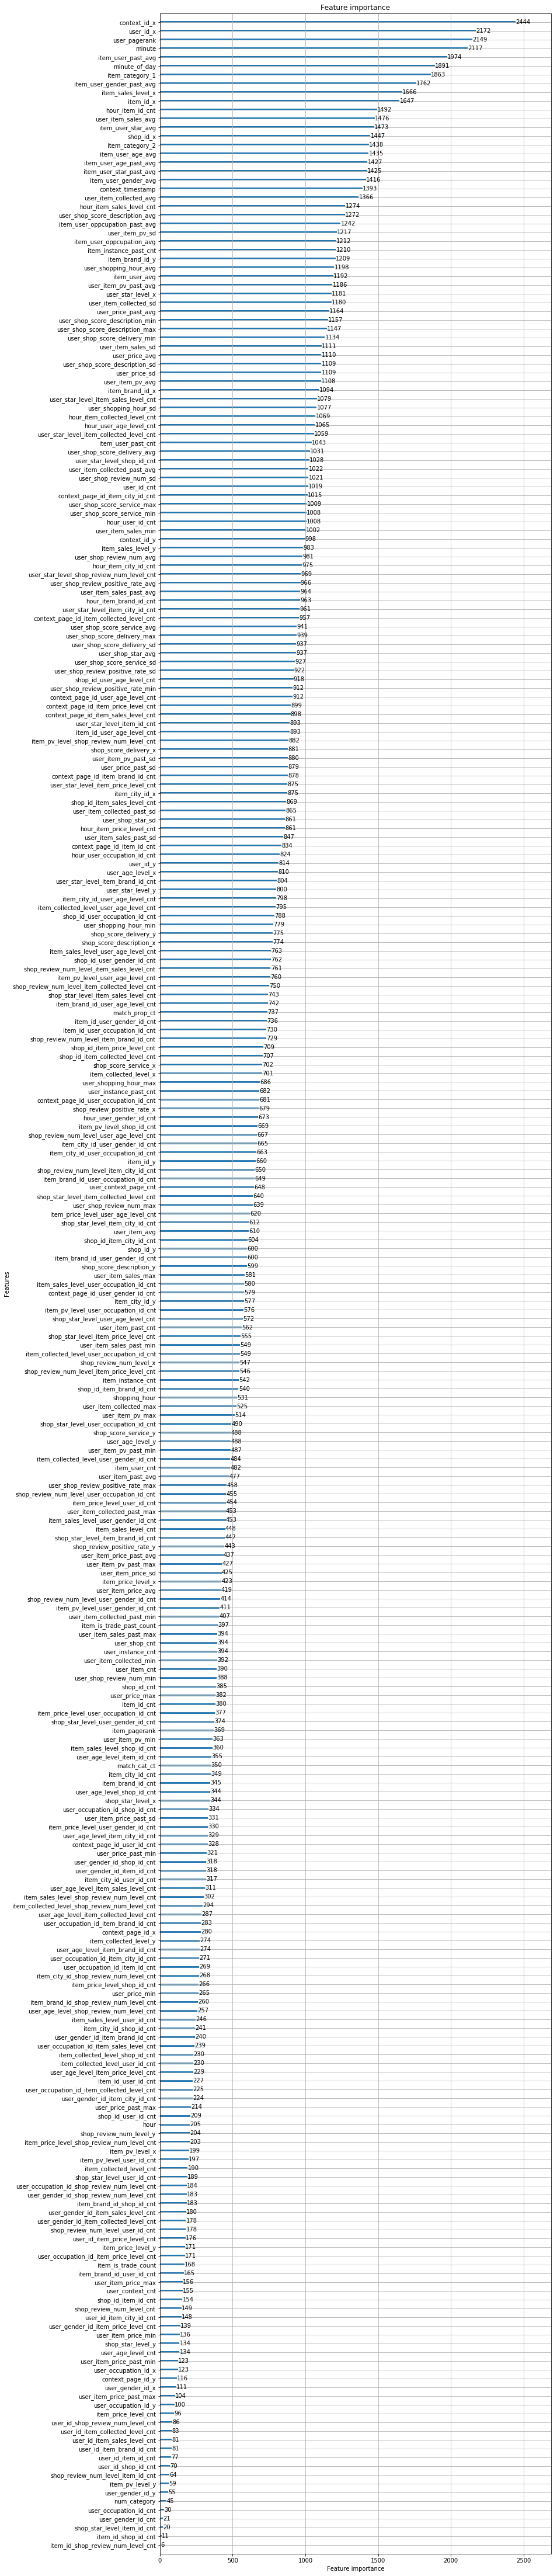

In [8]:
import lightgbm as lgb

print('plotting...')
lgb.plot_importance(model, figsize=(12, 80))